In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
iris=load_iris()

In [43]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [45]:
gnb.fit(df,iris.target)

GaussianNB(priors=None)

In [46]:
gnb.score(df,iris.target)

0.96

In [47]:
#multinomial naive bayes
review_data=pd.read_csv('/home/venkat/Documents/Training_Code/Notebook_repo/data-science-complete-tutorial/Data/Reviews.csv')

In [48]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [49]:
review_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [50]:
review_data=review_data[['Text','Score']]

In [51]:
review_data=review_data[review_data.Score!=3]

In [52]:
review_data['Sentiment']=review_data.Score.map(lambda s:0 if s<3 else 1)

In [53]:
review_data.drop('Score',axis=1,inplace=True)

In [54]:
review_data.head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [55]:
review_data.Sentiment.value_counts()

1    443777
0     82037
Name: Sentiment, dtype: int64

In [56]:
review_data=review_data.sample(1000)

In [57]:
#remove punctuations
from nltk.tokenize import RegexpTokenizer

In [58]:
tokenizer=RegexpTokenizer(r'[A-Za-z]+')
review_data.head()

,Text,Sentiment
318808,This is a really good choice for a nutritional...,1
369266,"I am impressed with the taste of this ""almond,...",1
440765,We have two 85-pound retriever mix dogs who re...,1
133589,Nice and strong with the raw ginger still in i...,1
38197,This is a great item! I love the silicon mater...,1


In [59]:
review_data['Text']=review_data.Text.map(lambda x:tokenizer.tokenize(x))

In [60]:
review_data.Text.head()

318808    [This, is, a, really, good, choice, for, a, nu...
369266    [I, am, impressed, with, the, taste, of, this,...
440765    [We, have, two, pound, retriever, mix, dogs, w...
133589    [Nice, and, strong, with, the, raw, ginger, st...
38197     [This, is, a, great, item, I, love, the, silic...
Name: Text, dtype: object

In [61]:
#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer('english')

In [62]:
review_data['Text']=review_data.Text.map(lambda l:[stemmer.stem(word) for word in l])

In [63]:
review_data.Text=review_data.Text.str.join(sep=' ')

In [65]:
review_data.head()

,Text,Sentiment
318808,this is a realli good choic for a nutrit sound...,1
369266,i am impress with the tast of this almond waln...,1
440765,we have two pound retriev mix dog who realli s...,1
133589,nice and strong with the raw ginger still in i...,1
38197,this is a great item i love the silicon materi...,1


In [66]:
#preprocessing
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')

In [67]:
review_data_tf=cv.fit_transform(review_data.Text)

In [70]:
review_data_tf

<1000x4399 sparse matrix of type '<class 'numpy.int64'>'
	with 29742 stored elements in Compressed Sparse Row format>

In [78]:
#splitting train and test
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(review_data_tf,review_data.Sentiment)

In [79]:
#target analysis
review_data.Sentiment.value_counts()

1    850
0    150
Name: Sentiment, dtype: int64

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
mnb=MultinomialNB(class_prior=[0.25,0.75])

In [82]:
mnb.fit(trainx,trainy)

MultinomialNB(alpha=1.0, class_prior=[0.25, 0.75], fit_prior=True)

In [83]:
mnb.class_prior

[0.25, 0.75]

In [86]:
y_pred=mnb.predict(testx)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=testy,y_pred=y_pred)

array([[ 14,  17],
       [ 10, 209]])

In [101]:
#bernoulli naive bayes only used for binary/boolean features
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)

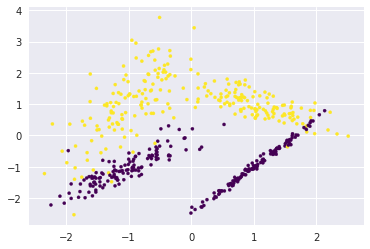

In [102]:
plt.scatter(X[:,0],X[:,1],c=Y,s=10,cmap='viridis')

In [103]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
trainx,testx,trainy,testy=train_test_split(X,Y)

In [104]:
bnb=BernoulliNB(binarize=0.0)
mnb=MultinomialNB()

In [105]:
bnb.fit(trainx,trainy)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [106]:
bnb.score(testx,testy)

0.896

In [107]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [108]:
Z=bnb.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

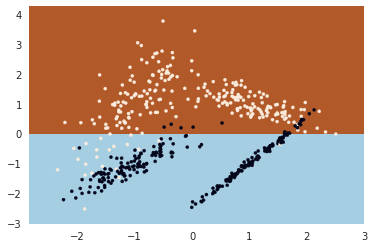

In [109]:
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

In [110]:
#out of core training
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [111]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(decode_error='ignore', n_features=2 ** 18,
                               alternate_sign=False)

In [113]:
review_data_chunks = pd.read_csv('/home/venkat/Documents/Training_Code/Notebook_repo/data-science-complete-tutorial/Data/Reviews.csv', chunksize=20000)

In [117]:
test = pd.read_csv('./Data/Reviews.csv').sample(10000)

In [122]:
test = test[['Text','Score']]
test = test[test.Score != 3]
test['Sentiment'] = test.Score.map(lambda s:0 if s < 3 else 1)
test.Text = test.Text.map(lambda x:tokenizer.tokenize(x))
test.Text = test.Text.map(lambda l: [stemmer.stem(word) for word in l])
test.Text = test.Text.str.join(sep=' ')
test_tf = vectorizer.transform(test.Text)
mnb = MultinomialNB(class_prior=[.22,.78])

In [ ]:
for idx,review_data in enumerate(review_data_chunks):
    print ('iter : ',idx)
    review_data = review_data[['Text','Score']]
    review_data = review_data[review_data.Score != 3]
    review_data['Sentiment'] = review_data.Score.map(lambda s:0 if s < 3 else 1)
    review_data.Text = review_data.Text.map(lambda x:tokenizer.tokenize(x))
    review_data.Text = review_data.Text.map(lambda l: [stemmer.stem(word) for word in l])
    review_data.Text = review_data.Text.str.join(sep=' ')
    text_tf = vectorizer.transform(review_data.Text)
    mnb.partial_fit(text_tf,review_data.Sentiment,classes=[0,1])
    y_pred = mnb.predict(test_tf)
    print (confusion_matrix(y_pred=y_pred, y_true=test.Sentiment))



iter :  0
[[   0 1467]
 [   0 7815]]
iter :  1
[[   0 1467]
 [   0 7815]]
iter :  2
[[   0 1467]
 [   0 7815]]
iter :  3
[[   0 1467]
 [   0 7815]]
iter :  4
[[   0 1467]
 [   0 7815]]
iter :  5
[[   0 1467]
 [   0 7815]]
iter :  6
[[   0 1467]
 [   0 7815]]
iter :  7
[[   0 1467]
 [   0 7815]]
iter :  8
